In [1]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: D492-755A

 C:\Users\USER\My_Problems\국립공원 데이터 시각화 디렉터리

2021-09-01  오후 08:54    <DIR>          .
2021-09-01  오후 08:54    <DIR>          ..
2021-09-01  오후 08:22    <DIR>          .ipynb_checkpoints
2021-09-01  오후 03:00             7,914 국립공원 기후변화측정망 현황_20141219..csv
2021-09-01  오후 08:22               576 국립공원 데이터 시각화.ipynb
2021-09-01  오후 02:56           110,042 국립공원공단_국립공원 CCTV 설치 현황_20201231.csv
2021-09-01  오후 02:36             4,502 국립공원공단_국립공원 계곡 하천 수질 측정_20131231.csv
2021-09-01  오후 02:52               742 국립공원공단_국립공원 공원시설 통계_20141223..csv
2021-09-01  오후 02:54             5,009 국립공원공단_국립공원 대피소_2015_20151231..csv
2021-09-01  오후 02:36         7,643,120 국립공원공단_국립공원 생물종 목록 DB_20131231.csv
2021-09-01  오후 02:34               335 국립공원공단_국립공원 조난사고통계 DB_20131231.csv
2021-09-01  오후 02:53             2,753 국립공원공단_국립공원용도지구현황_2018_20181231.csv
2021-09-01  오후 02:55               815 탐방객_현황_20210901145557.csv
              10개 파일           7,775,808 바이트
         

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [36]:
visit=pd.read_csv('./탐방객_현황_20210901145557.csv', encoding='CP949')

In [37]:
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   공원별(1)  24 non-null     object
 1   2017    24 non-null     int64 
 2   2018    24 non-null     int64 
 3   2019    24 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 896.0+ bytes


In [40]:
visit.set_index('공원별(1)', inplace=True)

In [41]:
visit.index.name='name'

In [42]:
visit

,2017,2018,2019
name,,,
총계,50398280,46824817,43184247
지리산,3067190,3308833,3005498
경주,2948636,2887634,2999547
계룡산,1721735,1817602,1949660
한려해상,7157772,6439653,6328709
오동도,3120325,3000678,2908368
설악산,3693991,3241484,2868098
속리산,1349381,1244854,1285804
한라산,1001437,891817,848279


In [43]:
visit_mt=visit.drop(['총계','경주','한려해상','오동도','태안해안','다도해해상'])

In [44]:
visit_mt

,2017,2018,2019
name,,,
지리산,3067190,3308833,3005498
계룡산,1721735,1817602,1949660
설악산,3693991,3241484,2868098
속리산,1349381,1244854,1285804
한라산,1001437,891817,848279
내장산,2102467,1948616,1907905
가야산,860181,672901,654682
덕유산,1731939,1501306,1222691
오대산,1510658,1399119,1360966


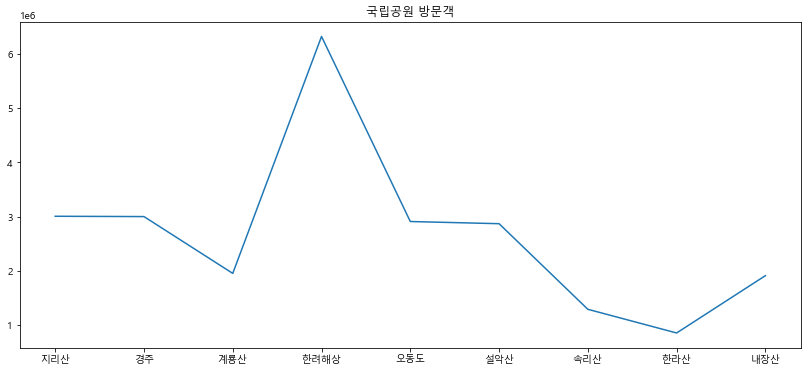

In [16]:
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.figure(figsize=(14,6))

x=visit['공원별(1)'][1:10]
y=visit['2019'][1:10]
plt.plot(x,y)
plt.title('국립공원 방문객')
plt.show()

Text(0.5, 1.0, '2019년 산악형 국립공원 방문객 수 비율')

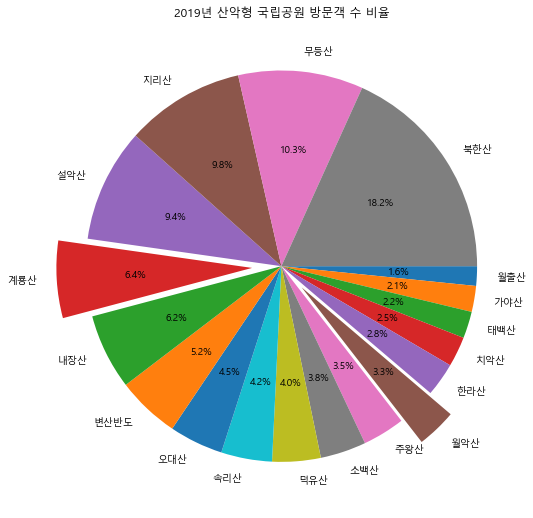

In [64]:
# 2019년 산악형 국립공원 방문객 순위
visit_mt=visit_mt.sort_values('2019', axis=0)
labels=list(visit_mt.index)
explode=[0,0,0,0,0,0.15,0,0,0,0,0,0,0,0.15,0,0,0,0]

plt.figure(figsize=(9,9))
plt.pie(visit_mt['2019'], labels=labels, autopct='%.1f%%', startangle=0, counterclock=False, explode=explode)
plt.title('2019년 산악형 국립공원 방문객 수 비율')